In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from spotipy import Spotify
from spotipy.oauth2 import SpotifyClientCredentials
from data_beats import *
import dotenv

In [ ]:
# Variables de entorno
dotenv.load_dotenv()
os.environ['SPOTIPY_CLIENT_ID'] = os.getenv('SPOTIPY_CLIENT_ID')
os.environ['SPOTIPY_CLIENT_SECRET'] = os.getenv('SPOTIPY_CLIENT_SECRET')
playlist_id = os.getenv('PLAYLIST_ID')

In [3]:
auth_manager = SpotifyClientCredentials()
sp = Spotify(auth_manager=auth_manager)

In [ ]:
# Ejecutar la extracción
all_tracks, playlist_name = get_all_playlist_tracks(sp, playlist_id)

🎵 Playlist: más chill
📊 Total de canciones: 54
⏳ Extrayendo todas las canciones...



Extrayendo: 100%|██████████| 54/54 [00:00<00:00, 61.59it/s] 

✅ 54 canciones extraídas exitosamente


In [ ]:
df = create_df(all_tracks)

Procesando datos: 100%|██████████| 54/54 [00:00<00:00, 475.78it/s]

🎉 DataFrame final creado


In [10]:
csv_filename = 'playlist_data_beats.csv'
csv_path = "dataset.csv"
df.to_csv(csv_path, index=False)
print(f"Archivo guardado: {csv_path}")

Archivo guardado: dataset.csv


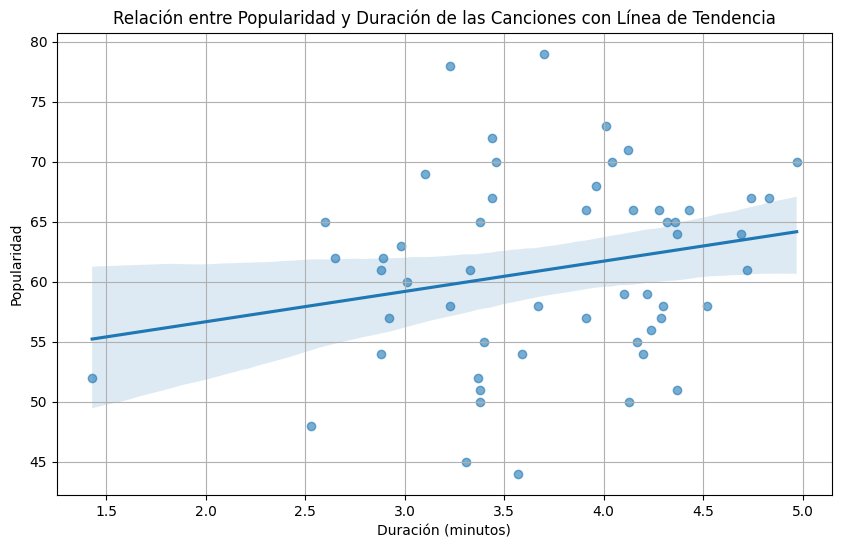

In [ ]:
# Crear un gráfico de dispersión con línea de tendencia
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='duration_minutes', y='popularity', scatter_kws={'alpha':0.6})
plt.title('Relación entre Popularidad y Duración de las Canciones con Línea de Tendencia')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')
plt.grid(True)
plt.show()